# Comparing a 3 Layer Neural Net against a <br> Convolutional Neural Net for MNIST

In [25]:
import os

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.python.client import device_lib
import tensorflow as tf
import os

import time

# Preprocess

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
n_train, ndim1, ndim2 = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, # Number of train
                          ndim1, # Height
                          ndim2, # Width
                          1) # Depth

X_test = X_test.reshape(n_test, # Number of train
                          ndim1, # Height
                          ndim2, # Width
                          1) # Depth

# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# # normalize to range 0-1
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# Convolutional Neural Network

In [31]:
model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 input_shape=(ndim1, ndim2, 1),
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) # Reduce dimensions for next layer
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary() # 96,266 params

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
flatten_5 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)              

In [39]:
start_time = time.time()

# Set Optimizer/Loss
optimizer = SGD(learning_rate=0.01,
                momentum = 0.2)

metrics = ['accuracy']

loss = categorical_crossentropy

model.compile(loss = loss,
              optimizer=optimizer,
              metrics=metrics)

# Set Callbacks / Early Stopping    
logdir = 'logs'
if not os.path.exists(logdir):
    os.makedirs(logdir)

model_path = os.path.join(logdir,
                          'model.{epoch:02d}-{val_loss:.2f}.h5')

callbacks = [
             EarlyStopping(monitor='val_loss',
                           patience=2,
                           min_delta=1e-3,
                           restore_best_weights=True,
                           verbose = 1),
    
             ModelCheckpoint(filepath=model_path,
                             monitor='val_loss', 
                             save_best_only=True),
            TensorBoard(log_dir=logdir,
                        histogram_freq=1),
            ]


batch_size = 64
epochs = 100
validation_split = 0.3
verbose = 1 # Print output

# Fit to training Data
history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split = validation_split,
                    callbacks = callbacks,
                    verbose = verbose)

print("--- %s seconds ---" % (time.time() - start_time))

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 11s 263us/step - loss: 0.0112 - accuracy: 0.9983 - val_loss: 0.0480 - val_accuracy: 0.9853
Epoch 2/100
42000/42000 [==============================] - 10s 242us/step - loss: 0.0093 - accuracy: 0.9989 - val_loss: 0.0558 - val_accuracy: 0.9836
Epoch 3/100
42000/42000 [==============================] - 10s 245us/step - loss: 0.0079 - accuracy: 0.9993 - val_loss: 0.0478 - val_accuracy: 0.9857
Restoring model weights from the end of the best epoch
Epoch 00003: early stopping
--- 33.37652111053467 seconds ---


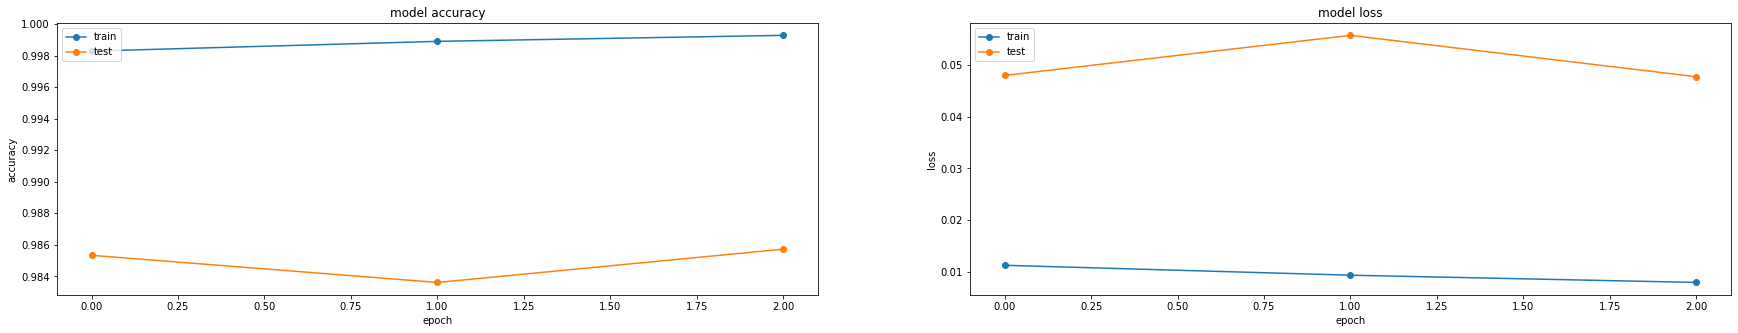

In [41]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,5))

# summarize history for accuracy
ax1.plot(history.history['accuracy'], marker='o')
ax1.plot(history.history['val_accuracy'], marker='o')
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history.history['loss'], marker='o')
ax2.plot(history.history['val_loss'], marker='o')
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

In [48]:
train_loss, train_acc = model.evaluate(X_train, 
                                       y_train,
                                       verbose=0)

test_loss, test_acc = model.evaluate(X_test,
                                     y_test,
                                     verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc*100, test_acc*100))
print('Margin: {}'.format((train_acc-test_acc)*100))

Train Accuracy: 99.477, Test Accuracy: 98.760
Margin: 0.7166624069213867


In [56]:
# Tensorboard
# %load_ext tensorboard
# %tensorboard --logdir logs

# Simple Neural Network

In [51]:
# Create Neural Network Architecture 3 - Layer Deep Neural Network
start_time = time.time()

model = Sequential()
model.add(Flatten(input_shape=(ndim1, ndim2, 1)))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# Set Optimizer/Loss
optimizer = SGD(learning_rate=0.01,
                momentum = 0.2)

metrics = ['accuracy']

loss = categorical_crossentropy

model.compile(loss = loss,
              optimizer=optimizer,
              metrics=metrics)

# Set Callbacks / Early Stopping    
logdir = 'logs'
if not os.path.exists(logdir):
    os.makedirs(logdir)

model_path = os.path.join(logdir,
                          'model.{epoch:02d}-{val_loss:.2f}.h5')

callbacks = [
             EarlyStopping(monitor='val_loss',
                           patience=1,
                           min_delta=1e-3,
                           restore_best_weights=True,
                           verbose = 1),
    
             ModelCheckpoint(filepath=model_path,
                             monitor='val_loss', 
                             save_best_only=True),
            TensorBoard(log_dir=logdir,
                        histogram_freq=1),
            ]


batch_size = 64
epochs = 100
validation_split = 0.3
verbose = 1 # Print output

# Fit to training Data
history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split = validation_split,
                    callbacks = callbacks,
                    verbose = verbose)
print("--- %s seconds ---" % (time.time() - start_time))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)              

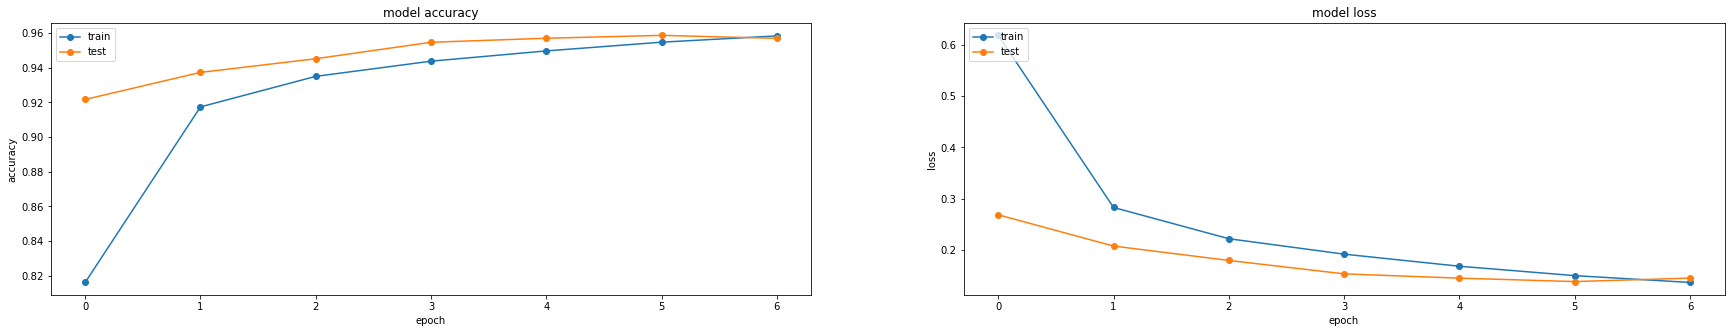

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,5))

# summarize history for accuracy
ax1.plot(history.history['accuracy'], marker='o')
ax1.plot(history.history['val_accuracy'], marker='o')
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history.history['loss'], marker='o')
ax2.plot(history.history['val_loss'], marker='o')
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

In [53]:
train_loss, train_acc = model.evaluate(X_train, 
                                       y_train,
                                       verbose=0)

test_loss, test_acc = model.evaluate(X_test,
                                     y_test,
                                     verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc*100, test_acc*100))
print('Margin: {}'.format((train_acc-test_acc)*100))

Train Accuracy: 96.727, Test Accuracy: 95.920
Margin: 0.8066654205322266


Comparing the Train and Test Accuracies, <br>
We can see that Convolutional Neural Networks takes less iteration and less time <br>
with greater accuracy than a Standard Neural Network